### ID3 Implemented from scratch with python
** some basic pandas and nupmpy utility functions are used

[1. Continuout to Discrete Convertion](#another_cell)

### Utility functions

Here I tried to avoid pandas utility functions and implemented many of them from scracth.

1. get_possible_labels
2. get_target_label_count
3. get_most_common
4. get_df_with_label

Note : By making use_pandas == False the code can be independent on pandas algorithms.

In [1]:
import pandas as pd
import sys
import numpy as np
import csv
from copy import deepcopy
from matplotlib import pyplot as plt
sys.__stdout__=sys.stdout
use_pandas=True

def get_attr_names(df):
    return list(df.columns.values)

def get_possible_labels(examples,attr_name):     #getting possible labels of a attribute
    return examples[attr_name].unique()

def get_target_label_counts(target_attr,target_labels): #getting target label counts of a dataset
    return dict(target_attr.value_counts())
    
def get_most_common(target_attr,target_labels):
    labels=[]
    if len(target_attr): 
        count_df=target_attr.value_counts()
        count_df=count_df.sort_values(ascending=False)
        _labels=list(count_df.index)
        
    return _labels[0],len(_labels)==1

def get_df_with_label(examples,target_attr,attr_name,label):                        
    _df=deepcopy(examples)
    _df['target']=target_attr
    _group=_df.groupby(attr_name)
    _df=_group.get_group(label)
    target_attrVi=_df['target']
    examplesVi=_df.drop('target',axis=1)
    examplesVi=examplesVi.drop(attr_name,axis=1) 
    return examplesVi,target_attrVi


<html>
<a href= id='another_cell'></a>
</html>

### Continuout to Discrete Convertion
1. Entropy based discretization. (Here I have implemented this from scratch)
2. Quantile based discretization. (I have used pandas qcut function)

I will try both in thios project.

Below I tried to implement entropy or information gain based discretization.

1. get_thersholds
2. best_split_by_info_gain
3. relabel attributes
4. Discretize

In [2]:
n_prev=2
def get_thrsholds(df,attr_name,target_attr):
        df[target_name]=target_attr
        sorted_df=df.sort_values(attr_name,axis=0).reset_index(drop=False)               #Sorting value
        old_index=sorted_df.index.values
        sorted_target=sorted_df[target_name].values
        
        prev_values=sorted_target[0:n_prev] #saving first value as previous value
        thrs_val=[]
        #import pdb;pdb.set_trace()
        for index in range(n_prev,len(sorted_target)):
                 
            curr_val=sorted_target[index]
            prev_values=sorted_target[index-n_prev:index]                                                             #saving values until any change in labels
            if curr_val not in prev_values: 
                val=df.loc[old_index[index],attr_name]                           #getting value of the threshold point 
                if val not in(thrs_val):                              #checking duplicate
                    thrs_val.append(val)                                
                

        #print(attr_name,thrs_val)
        return thrs_val                                       #returning threshold values and index
                
        #df get_splitted_gain


def best_split_by_info_gain(df,attr_name,target_attr,thrs_val):
        max_gain=0;best_thr=0
        
        tg_label_count=get_target_label_counts(target_attr,target_labels)   #getting target labels count
        total_items=(len(df))
        ent_s=entropy(tg_label_count)
        
        for val in thrs_val:                                                ####iteration over each threshold value
            left_ind=df[attr_name]>=val                                     ####spliting for a threshold value                                                                       
            right_ind=df[attr_name]<val
            df_left=df[left_ind]
            df_right=df[right_ind]
            df_list=[df_left,df_right]
            wg_ent_sum=0
            
            for sub_df in df_list:                                          #ierating over splited df
                target_attrVi=sub_df[target_name]
                tg_label_count=get_target_label_counts(target_attrVi,target_labels)
                ent=entropy(tg_label_count)
                no_items=len(target_attrVi)
                wg_ent_sum+=(no_items/total_items)*ent                      ####Getting weighted sum for splited data
            #print(ent_s,wg_ent_sum)
            gain=ent_s-wg_ent_sum                                           ####Getting gain
            if gain>max_gain:
                max_gain=gain
                best_thr=val                                                ####Getting thresh value with max gain
            #print(gain,val,best_thr)
        return best_thr
        
def relabel_attr(df,attr_name,best_thr):                                    
    new_df=deepcopy(df)
    new_df[df[attr_name]>=best_thr]= attr_name+'>='+str(best_thr)                         #Labeling values greater than threshold with descriptive string
    new_df[df[attr_name]<best_thr]= attr_name+'<'+str(best_thr)
        
    return new_df

def discretize(df,attr_names,target_attr,max_label=25):
    new_df=df.copy()
    for attr_name in attr_names:
        lb=get_possible_labels(df,attr_name)
        if(len(lb)>max_label) and df.dtypes[attr_name] !='object':
            #print(attr_name)
            thrs_val=get_thrsholds(df,attr_name,target_attr)
            best_thr=best_split_by_info_gain(df,attr_name,target_attr,thrs_val)
            new_attr=relabel_attr(df,attr_name,best_thr)
            new_df[attr_name]=new_attr
        else:
            labels=get_possible_labels(df,attr_name)
            lb_num=len(labels)
            if lb_num<=max_label:
                new_df[attr_name]=df[attr_name]
    
    return new_df

# ID3 Funtions
1. entropy
    
        entropy = -a*log2(a)  -b*log2(b) 
     

2. info_gain

        Gain wrt attribute A:
             group the target column by the classes of attribute A. Suppose A have classes a,b,c
        
        gain = entopy_total_dataset - ( entropy(split_a) + entropy(split_b) + entropy(split_c) )
        
        ** here entropy for the targtet column only is needed for gain calculation.


3. ID3
      
      
       1. Enter the ID3 function.
       2. Find the attribute with max information gain.
       3. For label in labels of best attribute :
                             4. get the subset of dataset with label 
                             5. if empty : return
                             6. ID3()
4. build tree
5. predict

In [3]:
def entropy(counts):
    total=0
    ent=0
    counts=list(counts.values())
    total=np.sum(counts)
    if total==0:
        return ent
    for val in counts:
        p=val/total
        if p!=0:
            ent-=1*p*np.log2(p)
    return ent

def info_gain(examples,attr_name,target_attr,target_labels):

    tg_label_count=get_target_label_counts(target_attr,target_labels)            #Getting label(+/-/others) count for dataset/subset
    ent_s=entropy(tg_label_count)                                                #Getting entropy for the dataset/subset
    total_items=len(examples)                                                      #getting total items count in attrumn(attribute)
    gain=0
    split_info=0
    labels=get_possible_labels(examples,attr_name)                                  #Getting possible labels for the attribute
    for i in range(len(labels)):
        _,target_attrVi=get_df_with_label(examples,target_attr,attr_name,labels[i]) #extract subset with label given
        tg_label_count=get_target_label_counts(target_attrVi,target_labels)         #Getting label(+/-/others) count for dataset/subset                                                                    #Running iteration over splitted labels

        ent=entropy(tg_label_count)                                                 #Getting entropy of each split
        no_of_items=len(target_attrVi)                                                 #weighted sum of entropies of splits
        ratio=no_of_items/total_items
        gain=gain+ent*(ratio)

        
        if ratio!=0:
            split_info-=(ratio*np.log2(ratio))                           #Getting weighted sum of split info
            
    gain=ent_s-gain                                                                #Getting information gain               
    if split_info!=0:
        gain_ratio=gain/split_info                                          
    #print('Log ....',attr_name,ent_s,gain)
    return split_info,gain


def get_best_attr(_examples):
    attr_names=get_attr_names(_examples)
    max_gain=-10e10  
    best_attr=None
    for attr_name in attr_names:                                                 
        _,gain_value= info_gain(_examples,attr_name,target_attr,target_labels)
        if gain_value>max_gain:
            max_gain=gain_value
            best_attr=attr_name
    return best_attr

def ID3(examples,target_attr,summary=[],res=[]):
    if len(target_attr)==0 or len(examples.columns)==0 : return summary,res              ### Checking for empty dataset
    most_common,all_same=get_most_common(target_attr,target_labels)                      ### Checking for all the labels same                
    if all_same:                                                                                                                                               
        res+=[target_name,most_common]
        summary.append(res)
        return summary,[]
    
    best_attr = get_best_attr(examples)                                                  ###Getting attribute with highest gain
    labels = get_possible_labels(examples,best_attr)                                     ###Getting possible labels for bes attribute
    for label in labels:
        examplesVi,target_attrVi=get_df_with_label(examples,target_attr,best_attr,label) ###Getting new subset of dataset
        if len(examplesVi)==0: continue                                                  ###Checking for empty datasets               
                                                                                                 
        res+=[best_attr,label]
        summary,res=ID3(examplesVi,target_attrVi,summary=summary,res=res)                ###Calling ID3 recursively
            
    return summary,res



In [4]:
def build_tree(summary):
    root=summary[0][0]
    for k in range(len(summary)):
        if summary[k][0]==root:
            temp=summary[k]
        if summary[k][0]!=root:
            for t in range(len(temp)):
                if temp[t]==summary[k][0]:
                    temp=temp[:t]
                    break
            summary[k]=temp+summary[k]
        #print(summary[k])
        
def predict(test_sample,summary):
    #import pdb;pdb.set_trace();
    for i in range(len(summary)):
            m=len(summary[i])                      #Taking a rule
            for j in range(m//2):
                attr=summary[i][2*j]               #Taking a attr
                label=summary[i][2*j+1]            #Taking corresponding label
                
                if attr!=target_name:               #last node is not reached
                   if test_sample[attr] != label:   #Checking up to this node test sample is following the rule or not ?
                        pred_label=summary[i][-1]  
                        break
                else :                              # Last Node break
                    pred_label=label
                    break                     
                                                   #if not break and go for next rule
            if attr == target_name:                #if test data satisfy have all the attr>> label in rule
                pred_label=label
                break                              #setting result according to rule
    return pred_label,i


def predict_all(test_samples,true_labels,summary,verbose=True):
    result_log={'right' : [],'wrong' : [],'Predictions' : [],'True Label' : []}
    acc=0
    fp={};fn={}; tp={};precision={};recall={}
    for label in target_labels:
        fp[label]=0
        fn[label]=0
        tp[label]=0
        recall[label]=0
        precision[label]=0
    if verbose==True:
        print('--------------------------------')
        print('Total Test Samples : ',len(test_samples))
    for kk in range(len(test_samples)):
        test_sample=test_samples.loc[kk,:]
        pred_label,rule_id=predict(test_sample,summary)
        true_label=true_labels[kk]
        if true_label==pred_label:        #Checking results validity from true label
                acc=acc+1
                tp[pred_label]+=1
                #break
                right=1;wrong=0
        else: wrong=1;right=0
        if true_label!=pred_label:
                 fn[true_label]+=1
                 fp[pred_label]+=1  
        result_log['right'].append(right)
        result_log['wrong'].append(wrong)
        result_log['Predictions'].append(pred_label)
        result_log['True Label'].append(true_label)
        
        
    accuracy=acc/len(test_df)*100
    
    for label in target_labels:
            try:recall[label]=tp[label]/(tp[label]+fn[label])
            except:0
            try:precision[label]=tp[label]/(tp[label]+fp[label])
            except:0
            if verbose==True:
                print('Class : ',label,'precision',precision[label],'recall',recall[label])
    
    if verbose==True: print('Summary : ','correct:',acc, 'total :',len(test_df),'accuracy :',acc/len(test_df)*100,'%')
    return accuracy,pd.DataFrame(result_log),precision,recall

### Main Loop

In [5]:
seed=123
np.random.seed(seed)
dataset='iris'
#dataset='titanic'
if dataset=='iris':
    df=pd.read_csv('Dataset/iris.csv',delimiter=',' )#,names=names)
    df=df.sample(frac=1).reset_index(drop=True)
    target_name='Species'#attr_names[-1]
if dataset=='titanic':
    df=pd.read_csv('Dataset/titanic.csv',delimiter=',' )#,names=names)
    target_name='Survived'#attr_names[-1]
    df=df.drop(['Ticket','Cabin'],axis=1)
df=df.fillna(df.mean())
df=df.replace(np.NaN,'nan')

summary=[]
res=[]
attr_names=get_attr_names(df)

target_attr=df[target_name]
target_labels=get_possible_labels(df,target_name)
df=df.drop(target_name,axis=1)
tind=attr_names.index(target_name)
attr_names=attr_names[:tind]+attr_names[tind+1:]

info_gain_discretize=True
quantile_discretize=False

if info_gain_discretize:
    df=discretize(df,attr_names,target_attr)
if quantile_discretize:
    for attr in attr_names:
        if df[attr].dtype!=object:
            temp=pd.qcut(df[attr],4,duplicates="drop")
            df[attr]=temp
            
            

print(attr_names,target_labels)
print(df.head(5))
#input('Press Enter to continue:')


split=int(0.67*len(df))
#split=0
train_df=df.loc[:split,:]
train_target_attr=target_attr.loc[:split]

test_df=df.loc[split:,:].reset_index(drop=True)
test_target=target_attr.loc[split:].reset_index(drop=True)



summary,_=ID3(train_df,train_target_attr)
build_tree(summary)    
    
accuracy,result_log,_,_=predict_all(test_df,test_target,summary)
print('No of rule trees',len(summary))
_result_log=result_log.copy()
_result_log['Predictions']=result_log['Predictions'].map({0:'No',1:'Yes'})
_result_log['True Label']=result_log['True Label'].map({0:'No',1:'Yes'})
result_log.head(10)


['Sepal_L', 'Sepal_W', 'Petal_L', 'Petal_W'] ['versicolor' 'virginica' 'setosa']
        Sepal_L  Sepal_W       Petal_L  Petal_W
0  Sepal_L>=5.6      2.5  Petal_L>=3.6      1.5
1  Sepal_L>=5.6      3.0  Petal_L>=3.6      2.1
2  Sepal_L>=5.6      2.8  Petal_L>=3.6      2.2
3  Sepal_L>=5.6      3.0  Petal_L>=3.6      1.3
4   Sepal_L<5.6      3.1   Petal_L<3.6      0.1
--------------------------------
Total Test Samples :  50
Class :  versicolor precision 0.7857142857142857 recall 1.0
Class :  virginica precision 1.0 recall 0.625
Class :  setosa precision 1.0 recall 1.0
Summary :  correct: 44 total : 50 accuracy : 88.0 %
No of rule trees 29


,right,wrong,Predictions,True Label
0,1,0,versicolor,versicolor
1,1,0,versicolor,versicolor
2,1,0,versicolor,versicolor
3,1,0,setosa,setosa
4,1,0,setosa,setosa
5,1,0,versicolor,versicolor
6,0,1,versicolor,virginica
7,1,0,setosa,setosa
8,1,0,setosa,setosa
9,1,0,versicolor,versicolor


### Plot of the true prediction vs true label

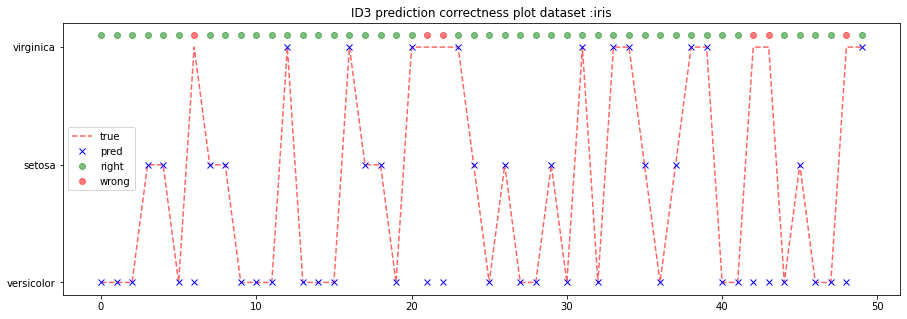

In [6]:
from matplotlib import pyplot as plt
#plt.plot(result_log[['right','wrong']])
if dataset=='iris': plt_const=1
if dataset=='titanic': plt_const=0
fig=plt.figure(figsize=(15,5))
plt.plot(result_log['True Label'],'r--',alpha=0.6)
plt.plot(result_log['Predictions'],'bx')
plt.plot(result_log['right'][result_log['right']==1]+0.1+plt_const,'go',alpha=0.5)
plt.plot(result_log['right'][result_log['right']==0]+1.1+plt_const,'ro',alpha=0.5)
#plt.plot(result_log.loc[:100,'right'],'go',alpha=0.3)
plt.legend(['true','pred','right','wrong'])
plt.title('ID3 prediction correctness plot dataset :'+dataset)# \n right : 1 \n wrong : 0')
plt.savefig(dataset+'pred.png')
plt.show()

### Reduced Error Pruning

In [7]:
from copy import deepcopy
print('Press Enter for reduced error pruning')
accuracy=0
max_i=0
max_acc=0
best_summary = summary
accs=[]
vbs=True
for i in range(len(summary)):
        temp_rule=deepcopy(summary[i])
        if (len(summary[i])>4):
            temp=summary[i][-2:]
            summary[i]=summary[i][:-4]
            summary[i]=summary[i]+temp
        #print(summary[i])
        if i==5: 
            vbs=False
            print('\n\n Skipping verbose output ...\n\n')
        accuracy,_,_,_=predict_all(test_df,test_target,summary,verbose=vbs)
        if accuracy>=max_acc:
            max_acc=accuracy
            best_summary=deepcopy(summary)
            max_i=i
        #print(accuracy)
        accs.append(accuracy)
        summary[i]=temp_rule
#print('summary',max_summary)

print('max_accuracy',max_acc)
#i  8
#max_accuracy 66.76300578034682


Press Enter for reduced error pruning
--------------------------------
Total Test Samples :  50
Class :  versicolor precision 0.7857142857142857 recall 1.0
Class :  virginica precision 1.0 recall 0.625
Class :  setosa precision 1.0 recall 1.0
Summary :  correct: 44 total : 50 accuracy : 88.0 %
--------------------------------
Total Test Samples :  50
Class :  versicolor precision 0.7857142857142857 recall 1.0
Class :  virginica precision 1.0 recall 0.625
Class :  setosa precision 1.0 recall 1.0
Summary :  correct: 44 total : 50 accuracy : 88.0 %
--------------------------------
Total Test Samples :  50
Class :  versicolor precision 0.7857142857142857 recall 1.0
Class :  virginica precision 1.0 recall 0.625
Class :  setosa precision 1.0 recall 1.0
Summary :  correct: 44 total : 50 accuracy : 88.0 %
--------------------------------
Total Test Samples :  50
Class :  versicolor precision 0.7857142857142857 recall 1.0
Class :  virginica precision 1.0 recall 0.625
Class :  setosa precision 1

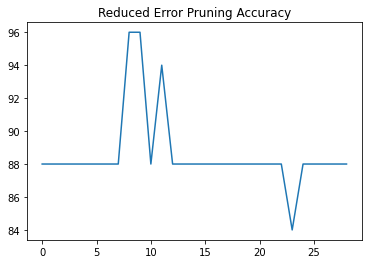

In [8]:
from matplotlib import pyplot as plt
plt.plot(np.array(accs))
plt.title('Reduced Error Pruning Accuracy')
plt.show()

In [9]:
accuracy,result_log,precision,recall=predict_all(test_df,test_target,best_summary,verbose=True)

--------------------------------
Total Test Samples :  50
Class :  versicolor precision 0.9166666666666666 recall 1.0
Class :  virginica precision 1.0 recall 0.875
Class :  setosa precision 1.0 recall 1.0
Summary :  correct: 48 total : 50 accuracy : 96.0 %


### Results :  Accuracy, Precision, Recall Summary

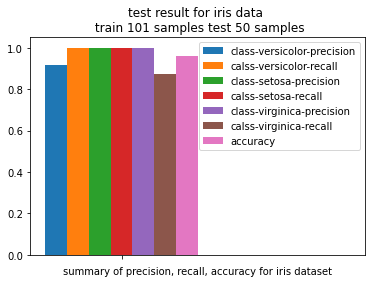

In [10]:
df=pd.DataFrame({},index=[''])
#fig=plt.figure(figsize=(10,10))
for label in result_log['True Label'].unique():
    df['class-'+str(label)+'-precision']=[precision[label],]
    df['calss-'+str(label)+'-recall']=[recall[label],]
df['accuracy']=accuracy/100  
df.plot.bar()
plt.xlim(-.3,.8)
plt.title('test result for ' +dataset+ ' data \n '+'train '+str(len(train_df))+' samples test '+str(len(result_log))+' samples')
plt.xlabel('summary of precision, recall, accuracy for iris dataset')
plt.savefig(dataset+'_ID3.png')
plt.show()

### Rules generated by the algorithm

In [11]:
for node in best_summary:
    for i,edge in enumerate(node):
        if i%2==0:
            print(edge,end='  ->')
        else: print(edge,end=' ')
    print('')

Petal_W  ->1.5 Sepal_W  ->2.5 Species  ->versicolor 
Petal_W  ->1.5 Sepal_W  ->2.8 Sepal_L  ->Sepal_L>=5.6 Petal_L  ->Petal_L>=3.6 Sepal_W  ->2.2 Species  ->virginica 
Petal_W  ->1.5 Sepal_W  ->3.1 Species  ->versicolor 
Petal_W  ->1.5 Sepal_W  ->3.2 Species  ->versicolor 
Petal_W  ->2.1 Species  ->virginica 
Petal_W  ->2.2 Species  ->virginica 
Petal_W  ->1.3 Species  ->versicolor 
Petal_W  ->0.1 Species  ->setosa 
Petal_W  ->1.8 Sepal_W  ->3.0 Species  ->virginica 
Petal_W  ->1.8 Species  ->virginica 
Petal_W  ->1.8 Sepal_W  ->3.2 Species  ->versicolor 
Petal_W  ->1.8 Sepal_W  ->2.5 Species  ->virginica 
Petal_W  ->0.2 Species  ->setosa 
Petal_W  ->1.2 Species  ->versicolor 
Petal_W  ->2.3 Species  ->virginica 
Petal_W  ->1.4 Species  ->versicolor 
Petal_W  ->0.3 Species  ->setosa 
Petal_W  ->0.4 Species  ->setosa 
Petal_W  ->2.0 Species  ->virginica 
Petal_W  ->1.9 Species  ->virginica 
Petal_W  ->1.0 Species  ->versicolor 
Petal_W  ->2.4 Species  ->virginica 
Petal_W  ->0.5 Species

## Extra debugging : Precision, Recall checking

In [12]:
total=len(result_log)
acc=result_log.right.sum()#,len(result_log)
accuracy=acc/total
labels=result_log['True Label'].unique()
for label in labels:
    true_ind=result_log['True Label']==label
    false_ind=result_log['True Label']!=label
    Yes=result_log.loc[true_ind]
    No=result_log.loc[false_ind]
    tp=Yes.right.sum()
    tn=No.right.sum()
    fn=Yes.wrong.sum() #wrong after negative prediction means positive
    fp=No.wrong.sum() #wrong after positive prediction means negative
    recall=tp/(tp+fn)
    precision=tp/(tp+fp)